# Car Selling Price Prediction Model

This data is a regression problem and this model is trying to predict the selling price of a car.

The following describes the features:

- **name**: Name and brand of the car
- **year**: The year the car was manufactured
- **selling_price**: The selling price of the car
- **km_driven**: The distance travelled of the car in kilometers.
- **fuel**: Type of fuel that the car used.
- **seller_type**: The type of seller of the car listing.
- **transmission**: The type of gear (Manual, Automatic)
- **owner**: The number of previous owners of the car.
- **mileage**: The amount of kilometers per liter of fuel the car can drive.
- **engine**: The total power generated by the engine.
- **max_power**: The highest power output that reaches the wheels at a certain RPM.
- **seats**: Number of seats in the car

# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import ppscore as pps
from scipy import stats

# 1. Load Data

In [2]:

df = pd.read_csv('../DatasetsML/Cars.csv')

In [3]:
# Print DataFrame's structure and content.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [4]:
# Print the first five rows of dataset
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
# Checking the null values
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [6]:
# Check the statistical information of data
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


# 2. Exploratory Data Analysis

In [7]:
# Label Encode and map 'First owner' to 1, ..., 'Test Drive Car' to 5

owner_mapping = {'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5}
df['owner'] = df['owner'].map(owner_mapping)

In [8]:
# Remove all rows where fuel is 'CNG' or 'LPG'

df = df[~df['fuel'].isin(['CNG','LPG'])]

In [9]:
# Remove 'kmpl' and convert the column to float

df['mileage'] = df['mileage'].str.replace('kmpl', '').astype('float64')

In [10]:
# Remove 'CC' and convert to float

df['engine'] = df['engine'].str.replace('CC', '').astype('float64')

In [11]:
# Remove 'bhp' and convert to float

df['max_power'] = df['max_power'].str.replace('bhp','').astype('float64')

In [12]:
# Keep only the first word

df['name'] = df['name'].str.split(' ', expand=True)[0]
df = df.rename(columns={'name': 'brand'}) 

In [13]:
# Drop the 'torque' column

df = df.drop(columns = ['torque'])

In [14]:
# Remove rows where the car is a 'Test Drive Car'

df = df[df['owner'] !=5]
map={"First Owner":1,"Second Owner":2,"Third Owner":3,"Fourth & Above Owner":4}
df.replace({"owner":map},inplace=True)

In [15]:
# Check the header of the data
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [17]:
# check columns name
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

# Univerate analysis
# Countplot
The "fuel", "seller_type", and "seats" columns are analyzed using count plots becuase the the data in these columns have only a few variations according to the result from countplot.

<Axes: xlabel='fuel', ylabel='count'>

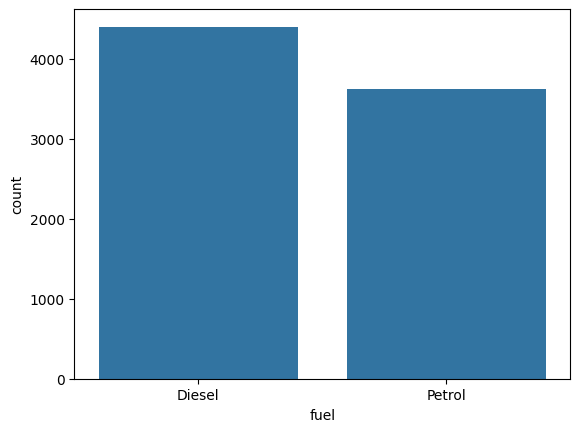

In [18]:
sns.countplot(data = df, x = 'fuel')

<Axes: xlabel='seller_type', ylabel='count'>

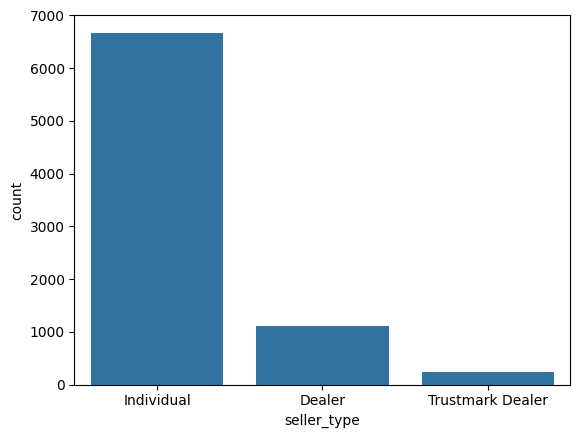

In [19]:
sns.countplot(data = df, x = 'seller_type')

<Axes: xlabel='seats', ylabel='count'>

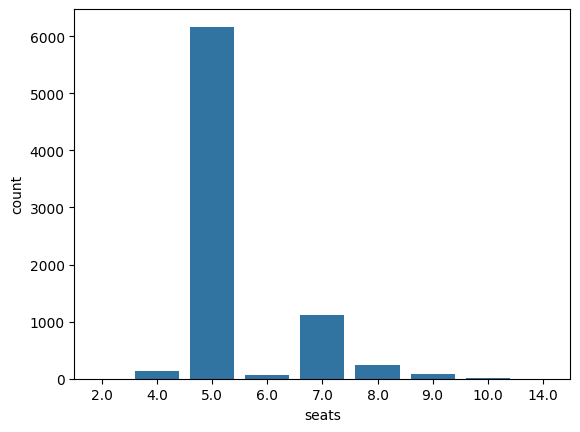

In [20]:
sns.countplot(data = df, x = 'seats')

# Distribution plot
The "year" column will be analyzed by using distribution plot to see its distribution.

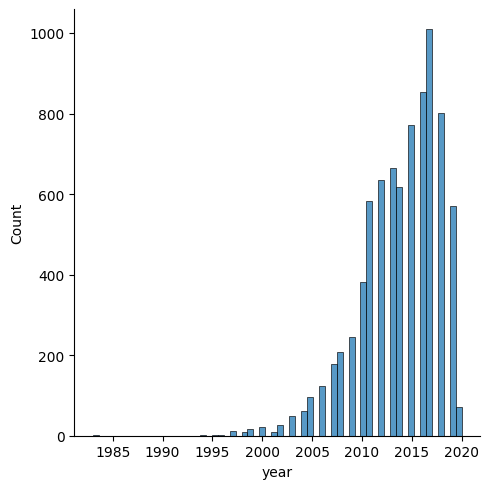

In [21]:

sns.displot(data = df, x = 'year')

We can observe that the year is normally distributed.

# Multivirate analysis
## Boxplot
The "fuel" and "seats" columns will be analyzed using box plot to check the outliers.

Text(0.5, 0, 'fuel')

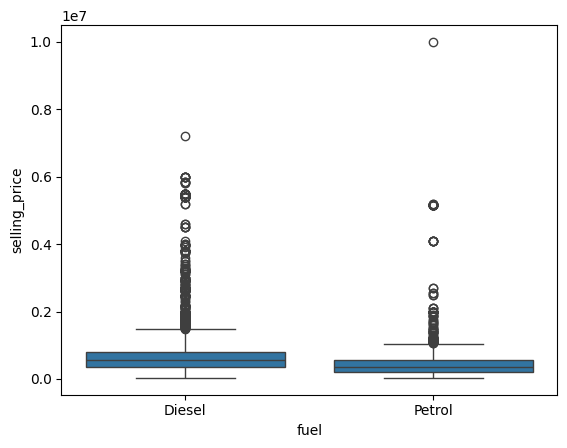

In [22]:
sns.boxplot(x = df['fuel'], y = df['selling_price'])
plt.ylabel("selling_price")
plt.xlabel("fuel")

Text(0.5, 0, 'seats')

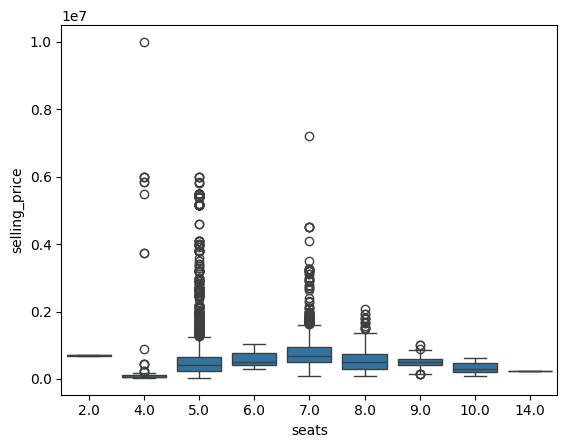

In [23]:
sns.boxplot(x = df['seats'], y = df['selling_price'])
plt.ylabel("selling_price")
plt.xlabel("seats")

# Correlateion matrix

In addition to the changes mentioned, the "name" column will be label encoded because the car brand name could significantly affect the sale price. The "fuel","seller type" and "transmission" columns will also be label encoded for the same reasons. This encoding is needed for exploring the data and creating the correlation matrix.

In [25]:
# label encoding to convert every columns to numeric
le = LabelEncoder()
df["brand"] = le.fit_transform(df["brand"])

In [26]:
# check to see what numbers are mapped to
le.classes_

array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
       'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [27]:
# save the names and get the mapping of the classes
brand_mapping = dict(zip(le.classes_, range(len(le.classes_))))
brand_mapping

{'Ambassador': 0,
 'Ashok': 1,
 'Audi': 2,
 'BMW': 3,
 'Chevrolet': 4,
 'Daewoo': 5,
 'Datsun': 6,
 'Fiat': 7,
 'Force': 8,
 'Ford': 9,
 'Honda': 10,
 'Hyundai': 11,
 'Isuzu': 12,
 'Jaguar': 13,
 'Jeep': 14,
 'Kia': 15,
 'Land': 16,
 'Lexus': 17,
 'MG': 18,
 'Mahindra': 19,
 'Maruti': 20,
 'Mercedes-Benz': 21,
 'Mitsubishi': 22,
 'Nissan': 23,
 'Opel': 24,
 'Peugeot': 25,
 'Renault': 26,
 'Skoda': 27,
 'Tata': 28,
 'Toyota': 29,
 'Volkswagen': 30,
 'Volvo': 31}

In [28]:
df['fuel'] = le.fit_transform(df['fuel'])

df['fuel'].unique()

array([0, 1])

In [29]:
le.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [30]:
df['seller_type'] = le.fit_transform(df['seller_type'])

df['seller_type'].unique()

array([1, 0, 2])

In [31]:
le.classes_

array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object)

In [32]:
df['transmission'] = le.fit_transform(df['transmission'])

df['transmission'].unique()

array([1, 0])

In [33]:
le.classes_

array(['Automatic', 'Manual'], dtype=object)

In [34]:
# Apply log transformation to the 'selling_price' column

df['selling_price'] = np.log(df['selling_price'])

In [35]:
df['selling_price']

0       13.017003
1       12.821258
2       11.970350
3       12.323856
4       11.775290
          ...    
8123    12.676076
8124    11.813030
8125    12.853176
8126    12.577636
8127    12.577636
Name: selling_price, Length: 8028, dtype: float64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   int32  
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   float64
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   int32  
 5   seller_type    8028 non-null   int32  
 6   transmission   8028 non-null   int32  
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(5), int32(4), int64(3)
memory usage: 947.9 KB


<Axes: >

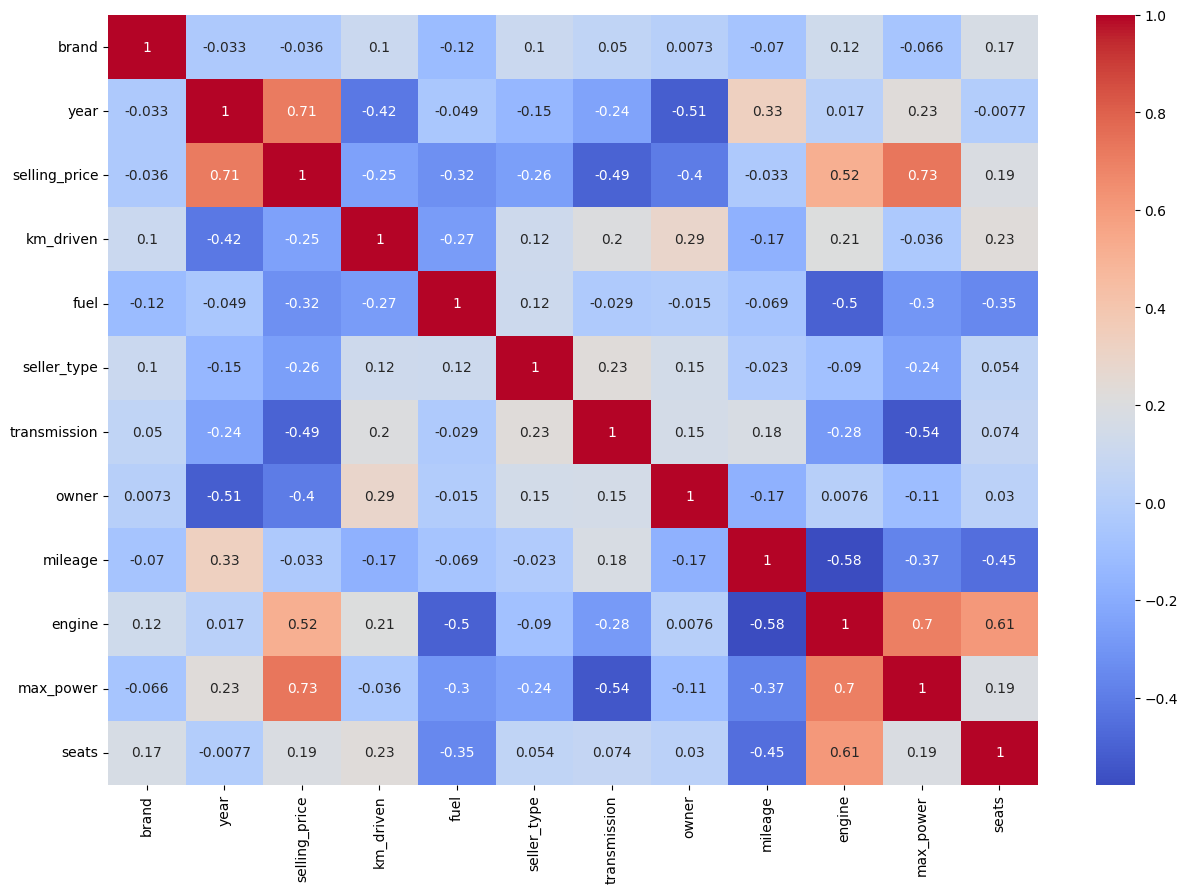

In [37]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

According to the heatmap, we can conclude that the selling proce of the cars are highly correlated to the years, max_power and engine of the cars. These features will have an impact on the selling_price of the cars.

The heatmap also shows the negative relations between mileage and engine that can tell us that the more the mileage, the less the selling price. 

By interpreting this heatmap can help us to choose which features should be the best in modeling.

# Predictive power score
We use the predictive power score library to better understand how features are related to the label and to confirm our assumptions about these relationships.

<Axes: xlabel='x', ylabel='y'>

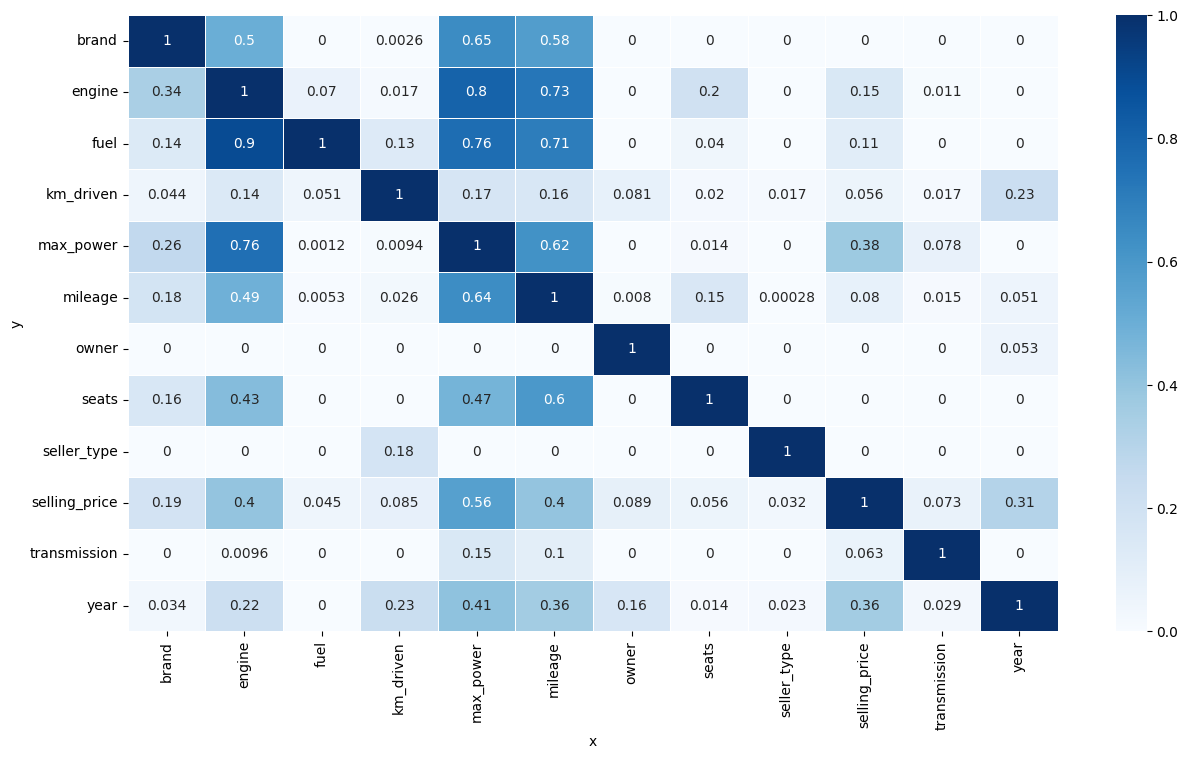

In [38]:
# Copy the data frame to avoid manipulating the original data frame
dfcopy = df.copy()

# Preprocessing using pivot
matrix_df = pps.matrix(dfcopy)[['x','y','ppscore']].pivot(columns = 'x', index = 'y', values = 'ppscore')

#plot
plt.figure(figsize=(15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidth = 0.5, annot = True)

# 3. Feature Engineering
We don't need to do the dimensionality reduction, feature splitting, and creating features in this data. So, we can skip this step.

# 4. Feature Selection
The features selected for prediction the target value are "engine", "mileage", and "max_power" because the selling price will be effect on how much the power engine can produce, how much kilometers per liter of fuel the car can drive, and the highest power output of the car.


In [39]:

X = df[['engine', 'mileage','max_power']]
y = df['selling_price']

In [40]:
X.shape , y.shape

((8028, 3), (8028,))

In [41]:
type(X) , type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [42]:
#shape of (m, n)
X = df[['engine','mileage','max_power']]
assert len(X.shape) == 2  # unit test

#shape of (m,)
y = df['selling_price']  
assert len(y.shape) == 1

In [43]:
# Split the data to training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [44]:
X_train.shape , X_test.shape

((6422, 3), (1606, 3))

In [45]:
y_train.shape , y_test.shape

((6422,), (1606,))

# 5. Preprocessing

In [46]:
# Checking null values
X_train.isnull().sum()

engine       166
mileage      166
max_power    162
dtype: int64

In [47]:
y_train.isnull().sum()

0

In [48]:
X_test.isnull().sum()

engine       48
mileage      48
max_power    46
dtype: int64

In [49]:
y_test.isnull().sum()

0

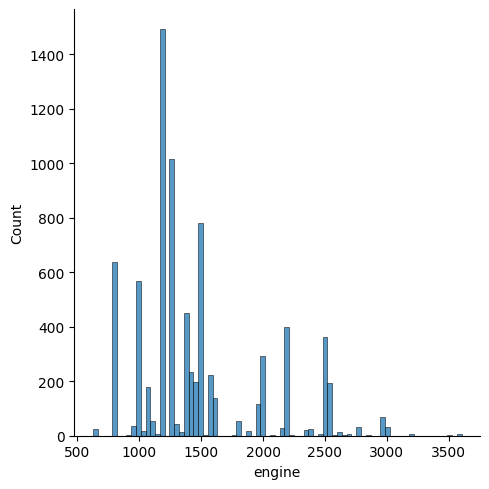

In [50]:
# Plot Distribution plot of engine
sns.displot(data=df, x='engine')

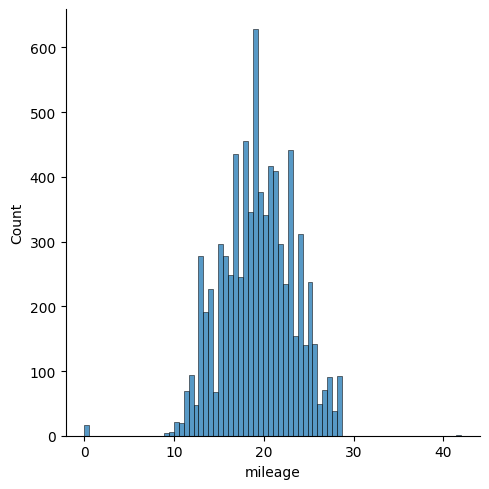

In [51]:
sns.displot(data=df, x='mileage')

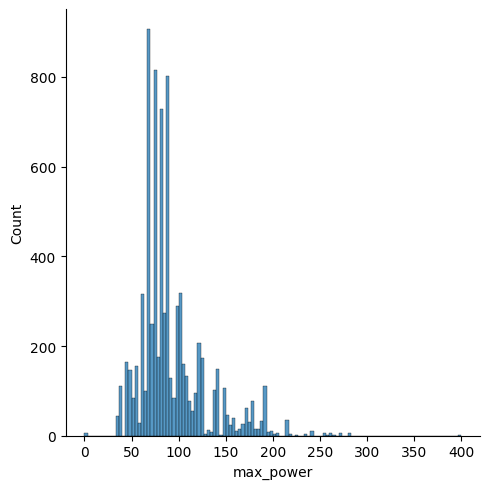

In [52]:
sns.displot(data=df, x='max_power')

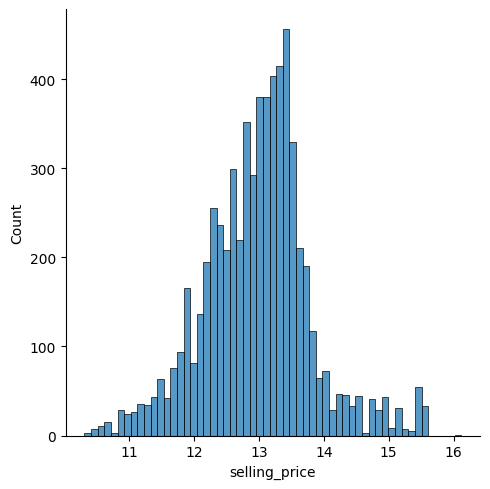

In [53]:
sns.displot(y_train)

In [54]:
# Fill the mean and medium into null values in training set
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].mean(), inplace=True)

In [55]:
# Fill the mean and medium into null values in test set
X_test['engine'].fillna(X_train['engine'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].mean(), inplace=True)

In [56]:
# Doing the same for targets
y_train.fillna(y_train.median(), inplace=True)
y_test.fillna(y_test.median(), inplace=True)

In [57]:
# Checking the null values
X_train[['mileage', 'engine','max_power']].isna().sum()

mileage      0
engine       0
max_power    0
dtype: int64

In [58]:
y_train.isna().sum()

0

In [59]:
y_test.isna().sum()

0

# Checking outliers

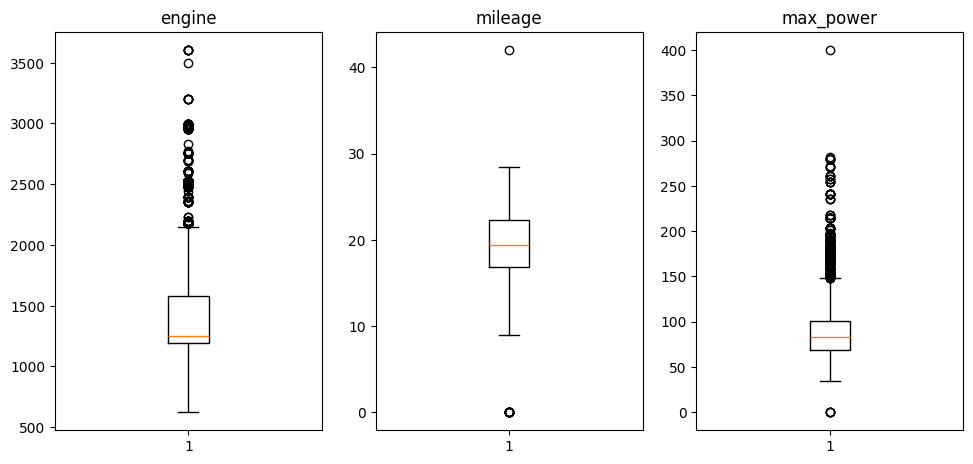

In [60]:
# Create a dictionary of columns.
col_dict = {'engine':1,'mileage':2,'max_power':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,5,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [61]:
def outlier_count(col, data = X_train):
    
    # calculate 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate the inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+17*'*' + col + 17*'*'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [62]:
for col in X_train[['engine','mileage', 'max_power']].columns:
    outlier_count(col)


*****************engine*****************

Number of outliers: 938
Percent of data that is outlier: 14.61%

*****************mileage*****************

Number of outliers: 16
Percent of data that is outlier: 0.25%

*****************max_power*****************

Number of outliers: 477
Percent of data that is outlier: 7.43%


In [63]:
# Shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 3)
Shape of X_test:  (1606, 3)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


# 6. Modeling

In [64]:
#cross-validation
#define algorithms to compare

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

algorithms = [LinearRegression(), RandomForestRegressor(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor()]
algorithms_name = ['LinearRegression', 'RandomForestRegressor', 'SVR', 'KNeighborsRegressor', 'DecisionTreeRegressor']


In [65]:
from sklearn.model_selection import KFold, cross_val_score

# Define lists to store mse
train_mse = []
test_mse = []

# Define the number of splits
kfold = KFold(n_splits = 5, shuffle = True)
for i,model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring = 'neg_mean_squared_error')
    print(f"{algorithms_name[i]}: Score: {scores} ; Mean: {scores.mean()}")

LinearRegression: Score: [-0.28645965 -0.28896093 -0.27621181 -0.27411703 -0.29516615] ; Mean: -0.2841831150224844
RandomForestRegressor: Score: [-0.09093039 -0.08681279 -0.07782409 -0.11019885 -0.09113883] ; Mean: -0.09138099189665323
SVR: Score: [-0.3119105  -0.34666297 -0.35514572 -0.33361268 -0.33430222] ; Mean: -0.3363268180010484
KNeighborsRegressor: Score: [-0.09346626 -0.11056767 -0.11348128 -0.10356193 -0.10539641] ; Mean: -0.10529471099014029
DecisionTreeRegressor: Score: [-0.10608406 -0.10398202 -0.08579364 -0.09357953 -0.10162034] ; Mean: -0.09821191750117929


# Grid search

In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5,10,None], 'n_estimators': [5,6,7,8,9,10]}
rf = RandomForestRegressor(random_state=1)
grid = GridSearchCV(estimator = rf,
                    param_grid = param_grid,
                    cv = kfold,
                    n_jobs = 1,
                    return_train_score = True,
                    refit = True,
                    scoring = 'neg_mean_squared_error')
grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(random_state=1), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'n_estimators': [5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [67]:
# Print parameters of best model
grid.best_params_

{'bootstrap': True, 'max_depth': None, 'n_estimators': 10}

In [68]:
# Find the grid_search's best score
best_mse = grid.best_score_

In [69]:
# Print mse score
best_mse

-0.09469557664519274

# 7. Testing

In [70]:
from sklearn.metrics import mean_squared_error

# Predict the test set
yhat = grid.predict(X_test)

# Calculate the mean square error
mean_squared_error(y_test, yhat)


0.08580156508564855

# 8. Analysis

In [71]:
# Find the feature importance by Algorithm way
rf = grid.best_estimator_

In [72]:
rf.feature_importances_

array([0.08692083, 0.16831461, 0.74476456])

<BarContainer object of 3 artists>

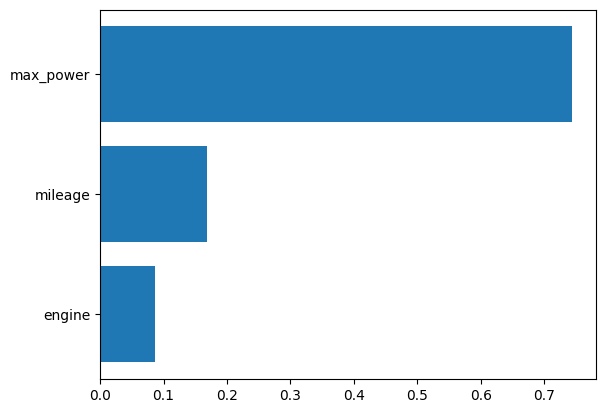

In [73]:
plt.barh(X.columns, rf.feature_importances_)

# Permutation way

Text(0.5, 0, 'Random Forest Feature Importance')

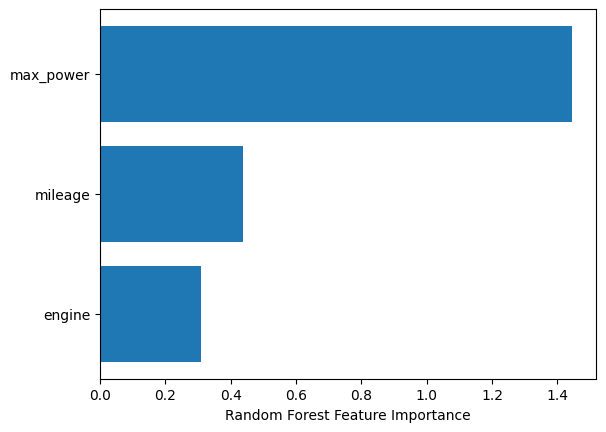

In [74]:

from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

# Let's plot
sorted_index = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_index], perm_importance.importances_mean[sorted_index])
plt.xlabel("Random Forest Feature Importance")

# Shap way

In [ ]:
pip install shap

In [76]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

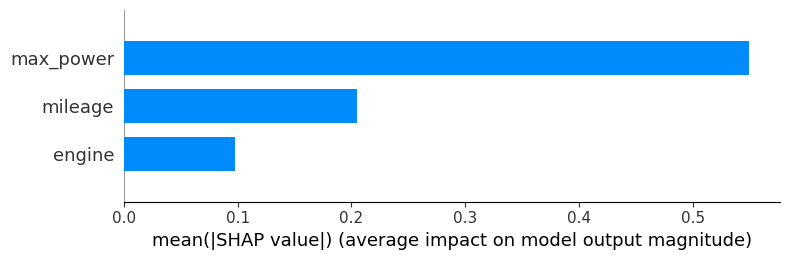

In [77]:
# Plot Shap
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X.columns)

# 9. Inference

In [78]:
import pickle

# save the model to disk
filename = 'car_selling_price.model'
pickle.dump(grid, open(filename, 'wb'))

In [79]:
# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))


In [80]:
print(type(loaded_model))

<class 'sklearn.model_selection._search.GridSearchCV'>


In [81]:
#Test the model with simple input
df[['engine','mileage','max_power','selling_price']].loc[500]

engine           1373.000000
mileage            17.500000
max_power          91.100000
selling_price      13.399995
Name: 500, dtype: float64

In [82]:
# The real selling price of this sample
np.exp(df['selling_price'].loc[500])

660000.0000000003

In [83]:
# Create array of sample data
#['engine', 'mileage','max_power']
sample = np.array([[1373, 17.5, 91.1]])

In [84]:
# Predict the selling price and taking exponent to show the car selling price
predicted_price = loaded_model.predict(sample)
predicted_price = np.exp(predicted_price)
predicted_price

array([689737.12613667])

### Car Selling Price Prediction Report

#### Selected Features

For predicting car selling prices, I selected the following features:

1. **'engine'**: Engine power is crucial because it affects both the performance and value of the car. 

2. **'mileage'**: Fuel efficiency is important to buyers due to fluctuating fuel prices. Therefore, mileage was included as a feature.

3. **'max_power'**: The car's maximum power output is also important to the buyers. The correlation matrix and pps score confirms this choice.

#### Model Selection

I used the **Random Forest Regressor** for this prediction task. Although the **Decision Tree Regressor** also performed well, Random Forest showed slightly better performance. Here is the detailed explanation about why Random Forest was preferred:

  
- **Robust to Outliers**: Random Forest is less affected by outliers compared to other models. This is particularly important as the 'engine' feature has about 15% outliers.
  
- **Ensemble Method**: As an ensemble method, Random Forest combines multiple decision trees, improving accuracy and robustness.

#### Model Performance

The Random Forest model’s predictions are satisfactory. The chosen features—'engine', 'mileage', and 'max_power'—all contribute to determining the selling price. Among these, 'max_power' is the most influential feature, even though the users and buyers may confuse it with engine power of the car, the model showed that it is the most important features to predict the selling price. 

#### Model File

The model file includes:
- The trained Random Forest model.

Overall, the selected features and the Random Forest Regressor provide a reasonable prediction of car selling prices.

